In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [310]:
DATA_PATH = "../data/"
CUSTOMER_FILE_NAME = "customer_20200707.parquet"
CONTACTS_FILE_NAME = "contacts_20200707.parquet"
SERVICE_FILE_NAME = "service_20200707.parquet"

# Load Data

In [311]:
customer_df = pd.read_parquet(DATA_PATH + CUSTOMER_FILE_NAME, engine='pyarrow')
service_df = pd.read_parquet(DATA_PATH + SERVICE_FILE_NAME, engine='pyarrow')
contact_df = pd.read_parquet(DATA_PATH + CONTACTS_FILE_NAME, engine='pyarrow')

# Customers

#### Table Overview

In [312]:
customer_df.head()

,cust_id_mask,record_date,age,gender,marital,children,income,risk_score,revolving
0,d3d11574-0554-4847-a142-1b90239c1679,2018-12-19,NaN,None,None,NaN,NaN,NaN,384.0
1,08fda4cd-8bd4-4775-b7f3-8b6f9857a74b,2017-05-10,27.0,Other,Unknown,0.0,11161.0,50.0,2279.0
2,611e16c0-6d44-4005-866c-863f5a8c20d6,1996-01-13,55.0,Other,Married,NaN,8364.0,10.0,262.0
3,042ea39c-009b-4aff-8f68-d42cda779efd,2002-10-19,51.0,Male,None,NaN,NaN,NaN,5027.0
4,2f851825-dbde-456c-895b-b241983fd163,2008-05-16,NaN,None,Single,3.0,9762.0,30.0,835.0


In [313]:
print(f'Amount of registers: {customer_df.shape[0]}')

Amount of registers: 150750


#### Duplicated values

In [314]:
duplicated_values_nb = customer_df.duplicated().sum()
print(f'Amount of duplicated rows: {duplicated_values_nb}')
print(f'Percentage of duplicates:  {100 *duplicated_values_nb / customer_df.shape[0]:.2}%')

Amount of duplicated rows: 750
Percentage of duplicates:  0.5%


In [315]:
# drop duplicated
customer_df = customer_df.drop_duplicates()
print(f'Amount of registers after deleting duplicated: {customer_df.shape[0]}')

Amount of registers after deleting duplicated: 150000


#### Missing values

In [316]:
missing_values_s = customer_df.isnull().mean().round(4) * 100
missing_values_s = missing_values_s.sort_values(ascending=False)
missing_values_s

children        50.05
risk_score      30.20
income          30.20
marital         30.20
age             30.11
gender          20.10
revolving        0.00
record_date      0.00
cust_id_mask     0.00
dtype: float64

<AxesSubplot:title={'center':'% of missing values'}>

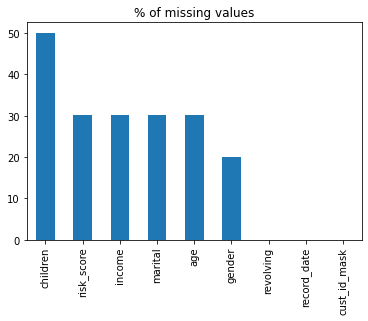

In [317]:
missing_values_s.plot(kind="bar", title="% of missing values")

#### Variables Distribution

#### Records Dates

<AxesSubplot:xlabel='record_date', ylabel='cust_id_mask'>

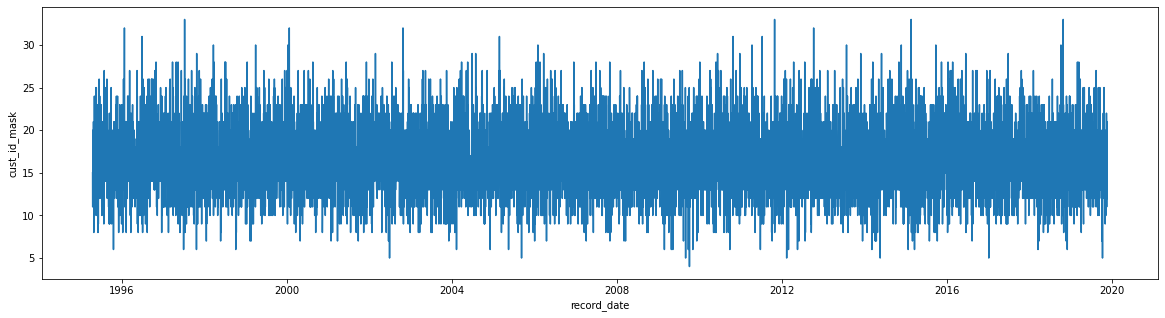

In [318]:
fig, ax = plt.subplots(figsize=(20, 5))
a = customer_df.groupby("record_date").agg({"cust_id_mask": "count"}).reset_index().sort_values("record_date")
sns.lineplot(data=a, x="record_date", y="cust_id_mask", ax=ax)

#### Categoricals

<AxesSubplot:title={'center':'marital'}, ylabel='marital'>

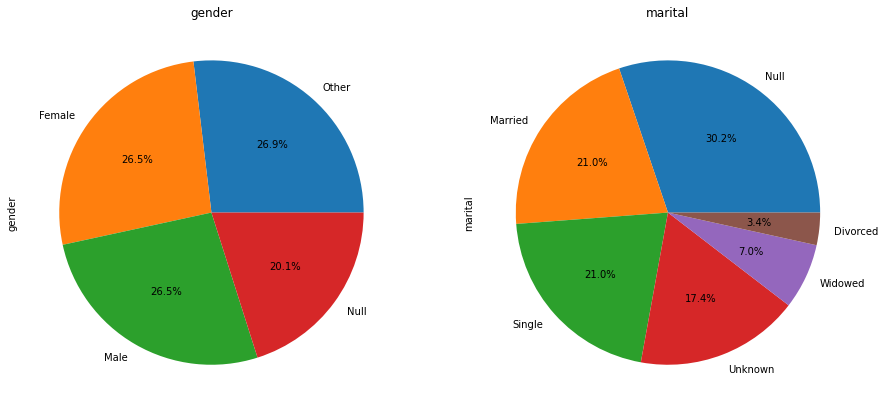

In [320]:
cat_columns = ["gender", "marital"]
customer_cat_df = customer_df[cat_columns].copy()
customer_cat_df.fillna('Null', inplace=True)
customer_cat_df = customer_cat_df[cat_columns].astype("string")

fig = plt.figure(figsize=[15, 8])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
customer_cat_df[cat_columns[0]].value_counts().plot(kind='pie', ax=ax1, title=cat_columns[0], autopct='%1.1f%%')
customer_cat_df[cat_columns[1]].value_counts().plot(kind='pie', ax=ax2, title=cat_columns[1], autopct='%1.1f%%')

#### Ordinals

In [321]:
ord_columns = ["age", "children", "risk_score"]
customer_df[ord_columns].describe()

,age,children,risk_score
count,104836.000000,74926.000000,104694.000000
mean,39.028530,1.004978,27.968174
std,11.857034,1.003718,15.355028
min,-13.000000,0.000000,10.000000
25%,31.000000,0.000000,10.000000
50%,39.000000,1.000000,20.000000
75%,47.000000,2.000000,40.000000
max,85.000000,7.000000,50.000000


<AxesSubplot:title={'center':'risk_score'}, ylabel='Frequency'>

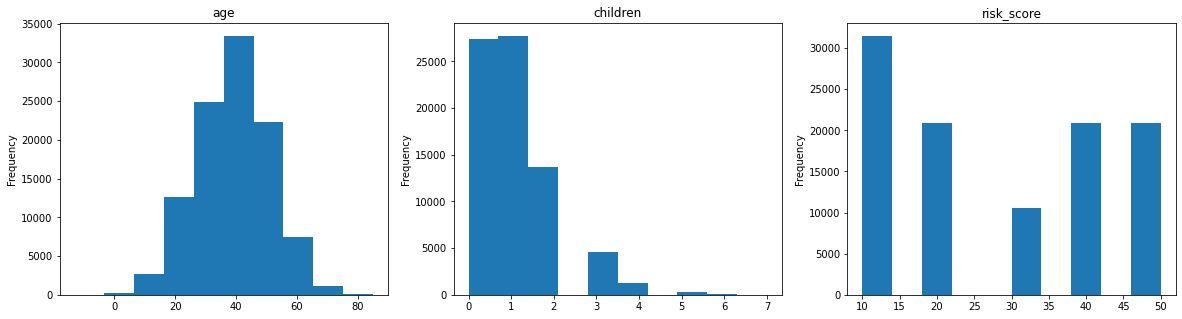

In [322]:
fig = plt.figure(figsize=[20, 5])
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

customer_df[ord_columns[0]].plot(kind="hist", ax=ax1, title=ord_columns[0])
customer_df[ord_columns[1]].plot(kind="hist", ax=ax2, title=ord_columns[1])
customer_df[ord_columns[2]].plot(kind="hist", ax=ax3, title=ord_columns[2])

#### Numerical

In [323]:
num_columns = ["income", "revolving"]
customer_df[num_columns].describe()

,income,revolving
count,104694.000000,150000.000000
mean,9995.690297,999.243887
std,2418.630482,999.196798
min,2334.000000,0.000000
25%,8609.000000,287.000000
50%,9724.000000,693.000000
75%,10804.000000,1386.000000
max,23345.000000,10571.000000


<AxesSubplot:xlabel='revolving'>

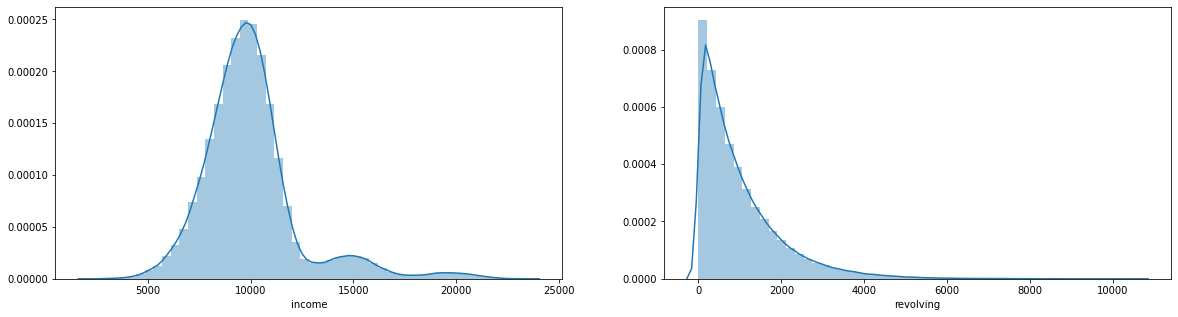

In [324]:
fig = plt.figure(figsize=[20, 5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(customer_df[num_columns[0]], ax=ax1)
sns.distplot(customer_df[num_columns[1]], ax=ax2)

# Service

#### Table Overview

In [325]:
service_df.head()

,cust_id_mask,record_date,product_id,product_name,default,cancelled
0,71e27d92-52c1-4200-a089-b4c8745c0f8b,2017-04-19,IS0002,Insurance 2,0,0
1,e2a61e4e-248d-49b4-84b6-10fb4171790e,2017-12-21,IS0001,Insurance 1,0,1
2,71119291-c8fa-4376-a29c-f79b2f1663c9,2019-09-13,CC0002,Credit Card 2,0,1
3,6d2e9b9e-24a5-4147-983f-30144d81f243,2019-08-10,IS0001,Insurance 1,1,1
4,cc845eae-b7e5-400e-a274-e1fc66d20e80,2017-07-19,IS0001,Insurance 1,1,1


In [326]:
print(f'Amount of registers: {service_df.shape[0]}')

Amount of registers: 160242


#### Duplicated values

In [327]:
duplicated_values_nb = service_df.duplicated().sum()
print(f'Amount of duplicated rows: {duplicated_values_nb}')
print(f'Percentage of duplicates:  {100 *duplicated_values_nb / service_df.shape[0]:.2}%')

Amount of duplicated rows: 0
Percentage of duplicates:  0.0%


#### Missing values

In [328]:
service_df.isnull().sum()

cust_id_mask    0
record_date     0
product_id      0
product_name    0
default         0
cancelled       0
dtype: int64

#### Variables Distribution

#### Records Dates

<AxesSubplot:xlabel='record_date', ylabel='cust_id_mask'>

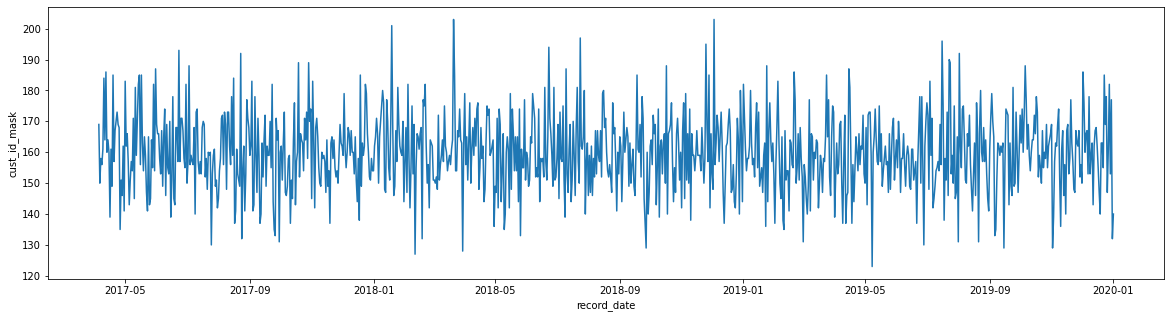

In [329]:
fig, ax = plt.subplots(figsize=(20, 5))
a = service_df.groupby("record_date").agg({"cust_id_mask": "count"}).reset_index().sort_values("record_date")
sns.lineplot(data=a, x="record_date", y="cust_id_mask", ax=ax)

#### Categorical & Boolean

<AxesSubplot:title={'center':'cancelled'}, ylabel='cancelled'>

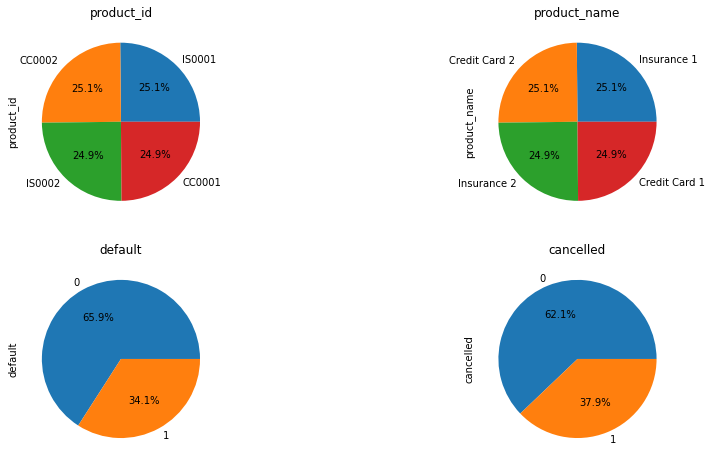

In [330]:
cat_columns = ["product_id", "product_name", "default", "cancelled"]

fig = plt.figure(figsize=[15, 8])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
service_df[cat_columns[0]].value_counts().plot(kind='pie', ax=ax1, title=cat_columns[0], autopct='%1.1f%%')
service_df[cat_columns[1]].value_counts().plot(kind='pie', ax=ax2, title=cat_columns[1], autopct='%1.1f%%')
service_df[cat_columns[2]].value_counts().plot(kind='pie', ax=ax3, title=cat_columns[2], autopct='%1.1f%%')
service_df[cat_columns[3]].value_counts().plot(kind='pie', ax=ax4, title=cat_columns[3], autopct='%1.1f%%')

#### product_name vs cancelled

<AxesSubplot:xlabel='product_name', ylabel='% of services transaction'>

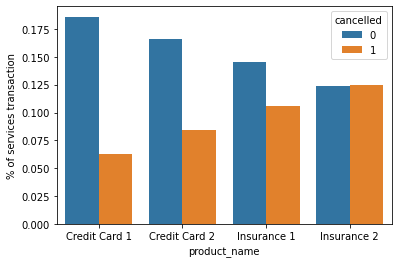

In [386]:
axis_y = "% of services transaction"
a = service_df.groupby('product_name')["cancelled"].value_counts() / len(service_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
sns.barplot(x='product_name', y=axis_y, hue='cancelled', data=a)

#### default vs cancelled

<AxesSubplot:xlabel='default', ylabel='% of services transaction'>

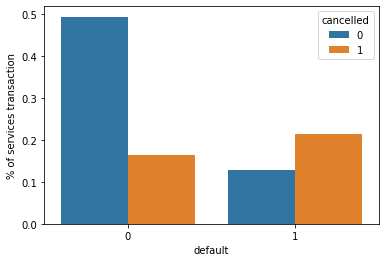

In [387]:
axis_y = "% of services transaction"
a = service_df.groupby('default')["cancelled"].value_counts() / len(service_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
sns.barplot(x='default', y=axis_y, hue='cancelled', data=a)

# Contacts

#### Table Overview

In [331]:
contact_df.head()

,cust_id_mask,record_date,channel,reason,result
0,47f6a0dc-80ad-4949-a772-50679ceed8ae,2018-08-05,phone,Issues,Solved
1,b3bc6f32-f71e-4768-98f6-b22c680b9ef5,2019-08-10,phone,Issues,Solved
2,ef0bed3b-7a33-4cdb-9e8a-61967ac4c6ad,2018-06-28,app,Administrative,Not Solved
3,af9d769f-837a-4ca7-a7ad-c027ccd7dea2,2019-03-28,visit,Sales,Not Solved
4,a0ae47dc-cbcb-420f-ab66-f589b555b570,2018-06-21,phone,Issues,Solved


In [332]:
print(f'Amount of registers: {contact_df.shape[0]}')

Amount of registers: 159687


#### Duplicated values

In [333]:
duplicated_values_nb = contact_df.duplicated().sum()
print(f'Amount of duplicated rows: {duplicated_values_nb}')
print(f'Percentage of duplicates:  {100 *duplicated_values_nb / service_df.shape[0]:.2}%')

Amount of duplicated rows: 0
Percentage of duplicates:  0.0%


#### Missing values

In [334]:
contact_df.isnull().sum()

cust_id_mask    0
record_date     0
channel         0
reason          0
result          0
dtype: int64

#### Records Dates

<AxesSubplot:xlabel='record_date', ylabel='cust_id_mask'>

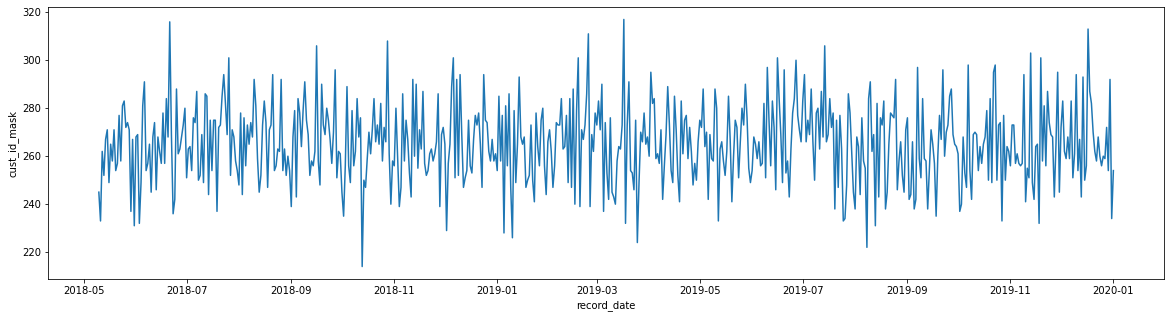

In [335]:
fig, ax = plt.subplots(figsize=(20, 5))
a = contact_df.groupby("record_date").agg({"cust_id_mask": "count"}).reset_index().sort_values("record_date")
sns.lineplot(data=a, x="record_date", y="cust_id_mask", ax=ax)

#### Categorical

<AxesSubplot:title={'center':'result'}, ylabel='result'>

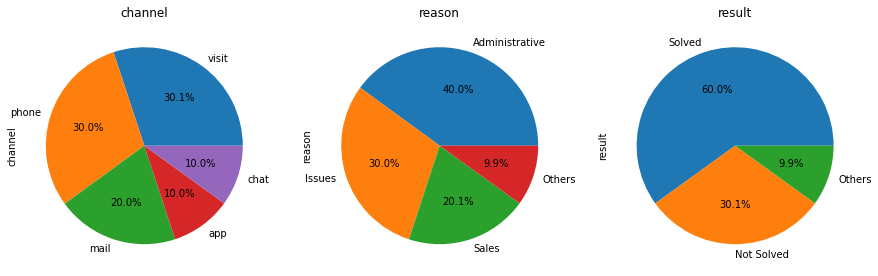

In [336]:
cat_columns = ["channel", "reason", "result"]

fig = plt.figure(figsize=[15, 8])
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
contact_df[cat_columns[0]].value_counts().plot(kind='pie', ax=ax1, title=cat_columns[0], autopct='%1.1f%%')
contact_df[cat_columns[1]].value_counts().plot(kind='pie', ax=ax2, title=cat_columns[1], autopct='%1.1f%%')
contact_df[cat_columns[2]].value_counts().plot(kind='pie', ax=ax3, title=cat_columns[2], autopct='%1.1f%%')

# Rename columns names

In [337]:
customer_df.rename(columns={'record_date':'record_date_customer'}, inplace=True)
service_df.rename(columns={'record_date':'record_date_service'}, inplace=True)
contact_df.rename(columns={'record_date':'record_date_contact'}, inplace=True)

# Add customer information to services

In [389]:
service_customer_df = service_df.merge(customer_df, how="left", on="cust_id_mask")
service_customer_df.head(2)

,cust_id_mask,record_date_service,product_id,product_name,default,cancelled,record_date_customer,age,gender,marital,children,income,risk_score,revolving
0,71e27d92-52c1-4200-a089-b4c8745c0f8b,2017-04-19,IS0002,Insurance 2,0,0,2012-01-07,54.0,Other,None,1.0,NaN,NaN,155.0
1,e2a61e4e-248d-49b4-84b6-10fb4171790e,2017-12-21,IS0001,Insurance 1,0,1,2005-11-22,38.0,Other,Single,1.0,8904.0,20.0,419.0


In [681]:
service_customer_df["month_old"] = (service_customer_df["record_date_service"] - service_customer_df["record_date_customer"]).apply(lambda x: x.days / 30)

#### month_old vs cancelled

<AxesSubplot:xlabel='cancelled', ylabel='month_old'>

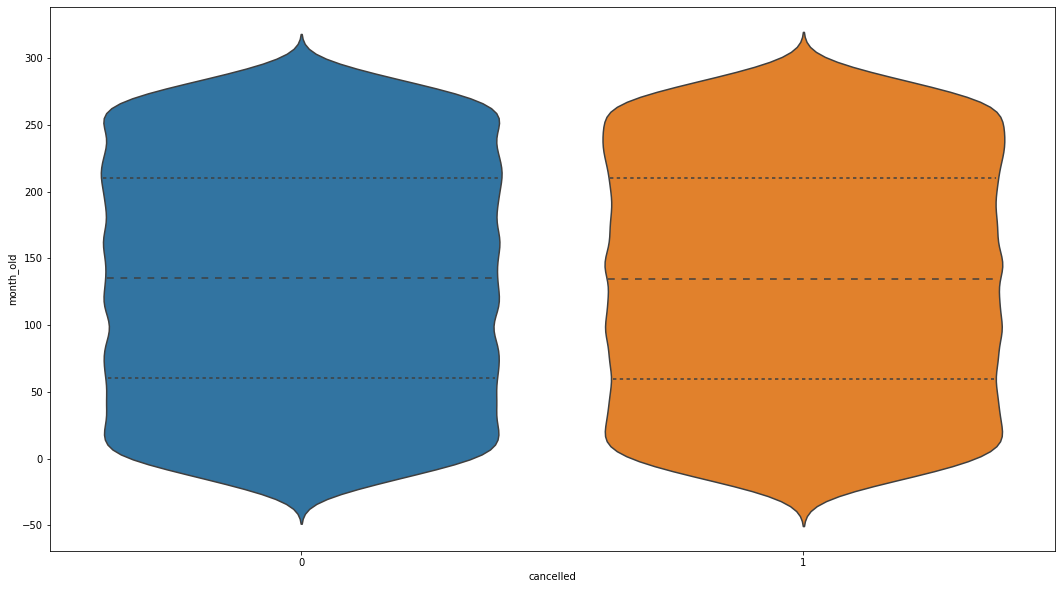

In [684]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.violinplot(data=service_customer_df, x="cancelled", y="month_old", inner="quartile", ax=ax)

#### revolving vs cancelled

<AxesSubplot:xlabel='cancelled', ylabel='revolving'>

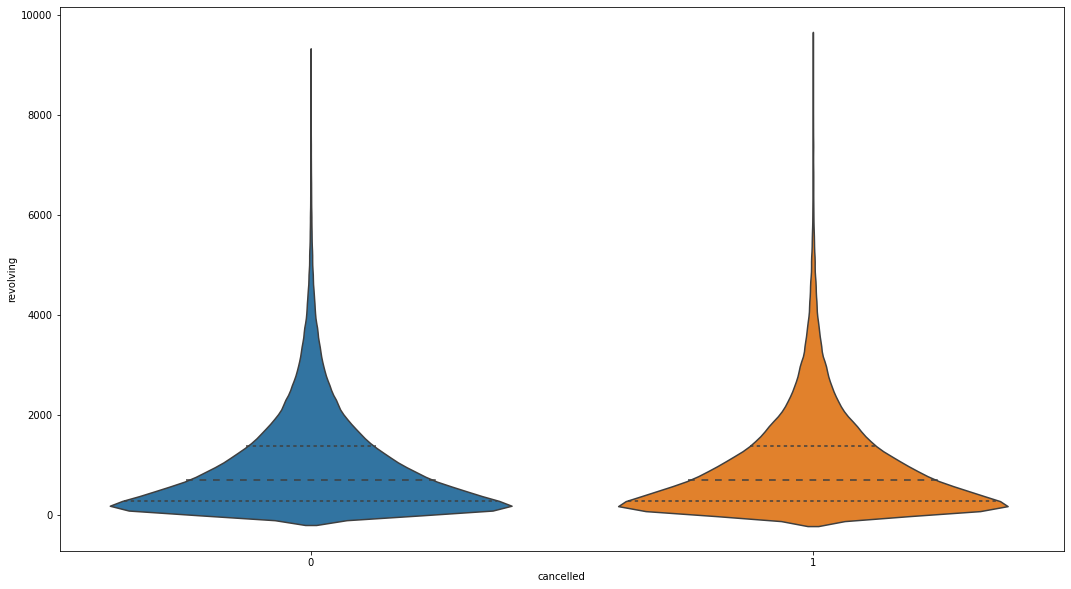

In [629]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.violinplot(data=service_customer_df, x="cancelled", y="revolving", inner="quartile", ax=ax)

#### income vs cancelled

<AxesSubplot:xlabel='cancelled', ylabel='income'>

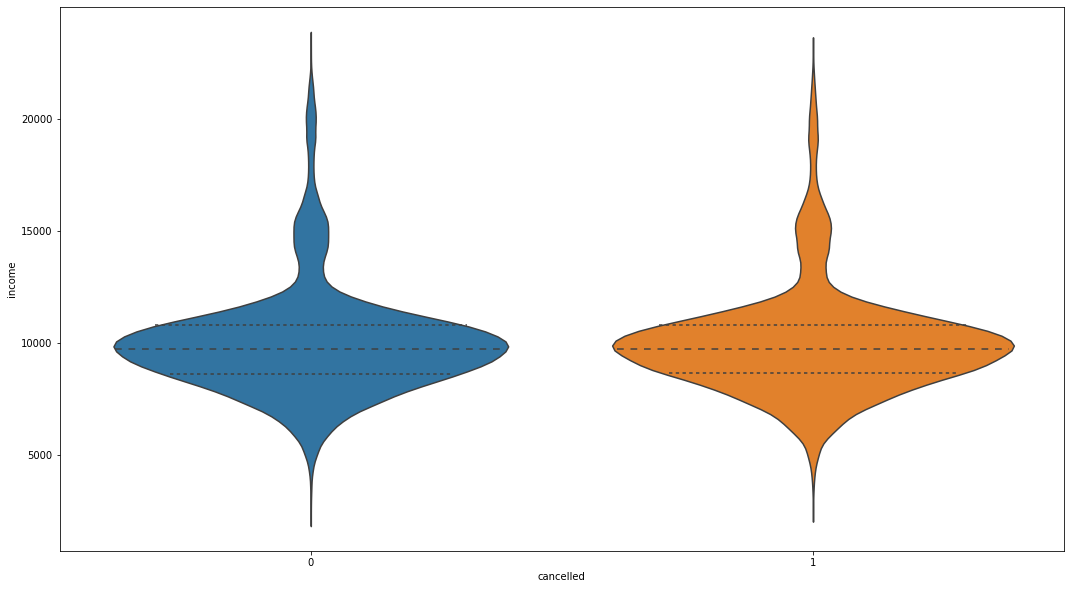

In [630]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.violinplot(data=service_customer_df, x="cancelled", y="income", inner="quartile", ax=ax)

#### risk_score  vs cancelled

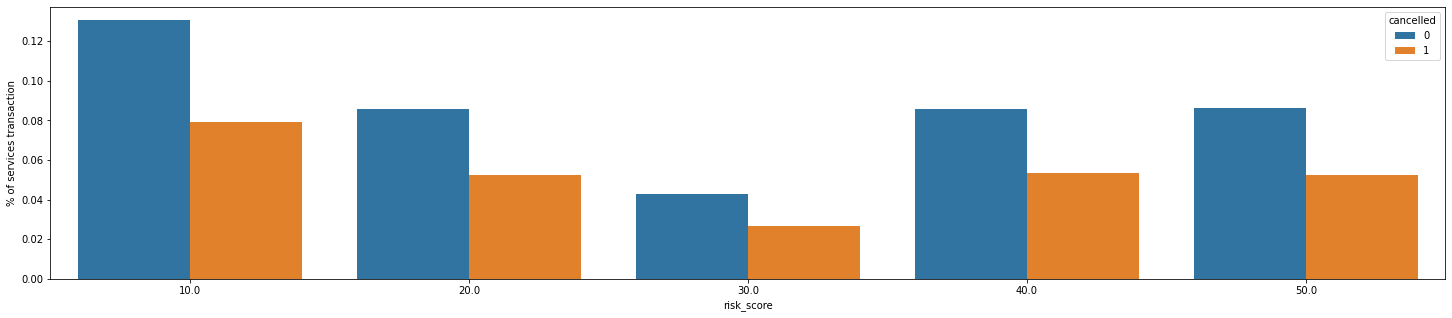

In [620]:
fig, axis = plt.subplots(1, 1, figsize=(25, 5))
axis_y = "% of services transaction"

a = service_customer_df.groupby('risk_score')["cancelled"].value_counts() / len(service_customer_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()

ax = sns.barplot(x='risk_score', y=axis_y, hue='cancelled', data=a, ax=axis)

#### customer caracterization  vs cancelled

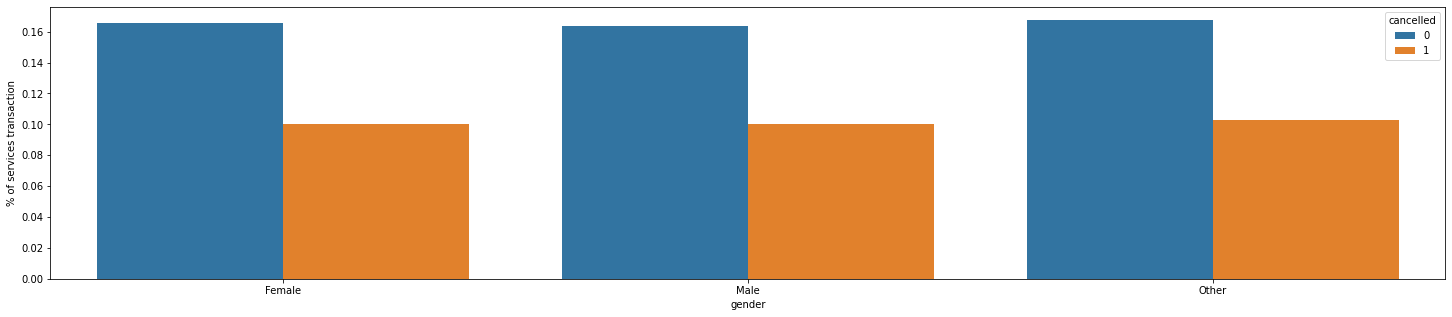

In [622]:
fig, axis = plt.subplots(1, 1, figsize=(25, 5))
axis_y = "% of services transaction"
variable_to_analyse = "gender"
a = service_customer_df.groupby(variable_to_analyse)["cancelled"].value_counts() / len(service_customer_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()

ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis)

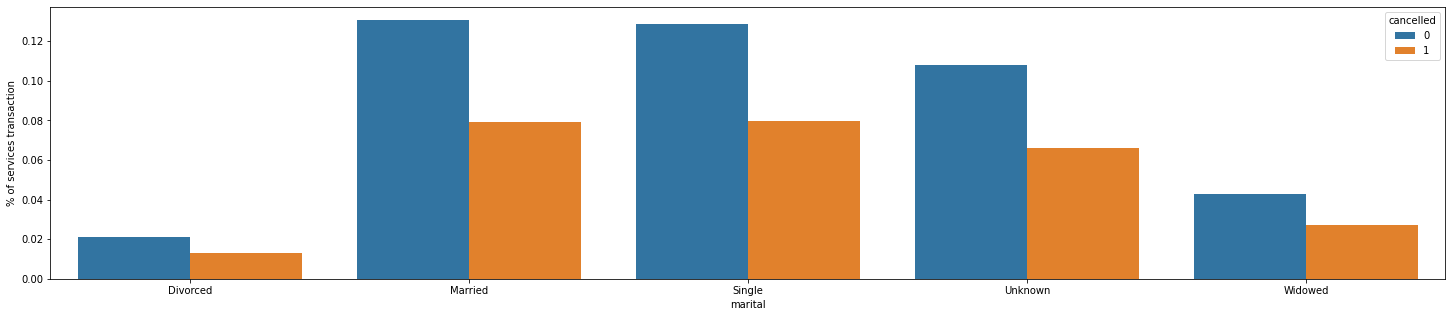

In [623]:
fig, axis = plt.subplots(1, 1, figsize=(25, 5))
axis_y = "% of services transaction"
variable_to_analyse = "marital"
a = service_customer_df.groupby(variable_to_analyse)["cancelled"].value_counts() / len(service_customer_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()

ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis)

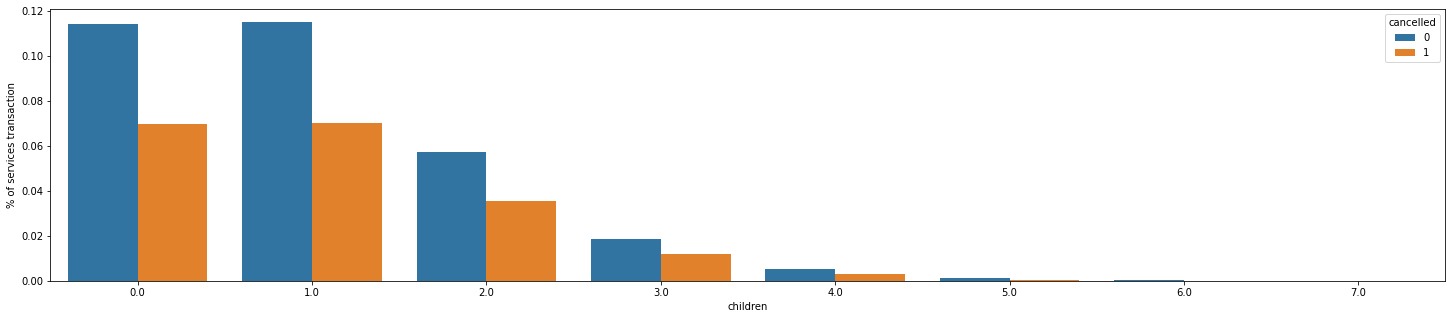

In [624]:
fig, axis = plt.subplots(1, 1, figsize=(25, 5))
axis_y = "% of services transaction"
variable_to_analyse = "children"
a = service_customer_df.groupby(variable_to_analyse)["cancelled"].value_counts() / len(service_customer_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()

ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis)

<AxesSubplot:xlabel='cancelled', ylabel='age'>

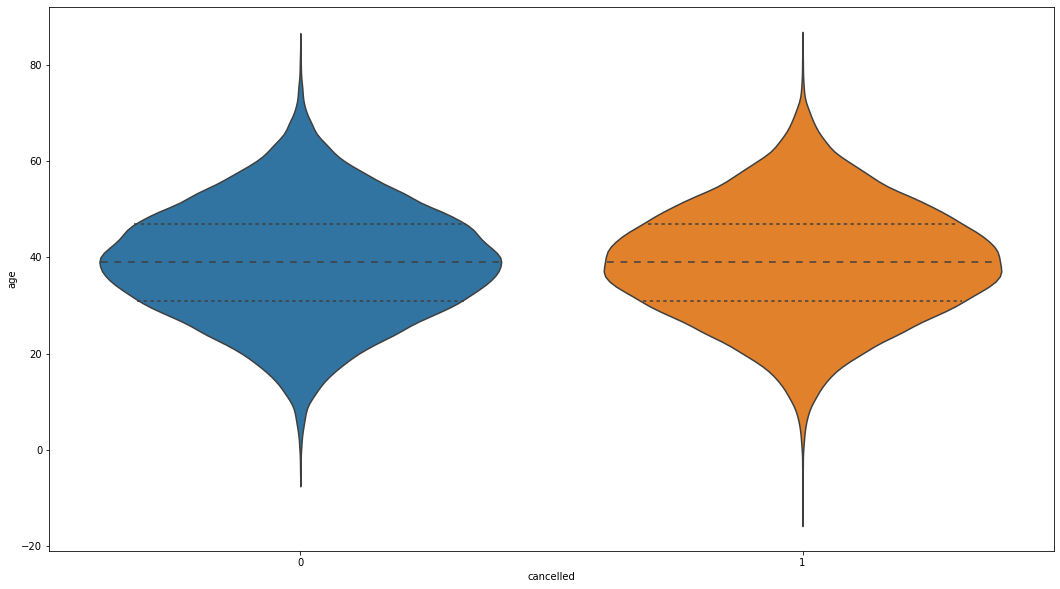

In [631]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.violinplot(data=service_customer_df, x="cancelled", y="age", inner="quartile", ax=ax)

# Add contact information to services

In [484]:
columns_seed = ["channel", "reason", "result"]
dummies = pd.get_dummies(contact_df[columns_seed])
dummies_columns = list(dummies.columns)
contact_df[dummies_columns] = dummies
contact_df = contact_df.drop(columns=columns_seed)
contact_df.head(2)

,cust_id_mask,record_date_contact,channel_app,channel_chat,channel_mail,channel_phone,channel_visit,reason_Administrative,reason_Issues,reason_Others,reason_Sales,result_Not Solved,result_Others,result_Solved
0,47f6a0dc-80ad-4949-a772-50679ceed8ae,2018-08-05,0,0,0,1,0,0,1,0,0,0,0,1
1,b3bc6f32-f71e-4768-98f6-b22c680b9ef5,2019-08-10,0,0,0,1,0,0,1,0,0,0,0,1
2,ef0bed3b-7a33-4cdb-9e8a-61967ac4c6ad,2018-06-28,1,0,0,0,0,1,0,0,0,1,0,0
3,af9d769f-837a-4ca7-a7ad-c027ccd7dea2,2019-03-28,0,0,0,0,1,0,0,0,1,1,0,0
4,a0ae47dc-cbcb-420f-ab66-f589b555b570,2018-06-21,0,0,0,1,0,0,1,0,0,0,0,1


In [716]:
service_contact_df = service_df[["cust_id_mask", "record_date_service"]].merge(contact_df, how="inner", on="cust_id_mask")

# Tickets raised before date transaction
service_contact_df = service_contact_df[service_contact_df["record_date_contact"] < service_contact_df["record_date_service"]]

agg_dict = {
    'channel_app': 'sum',
    'channel_chat': 'sum',
    'channel_mail': 'sum',
    'channel_phone': 'sum',
    'channel_visit': 'sum',
    'reason_Administrative': 'sum',
    'reason_Issues': 'sum',
    'reason_Others': 'sum',
    'reason_Sales': 'sum',
    'result_Not Solved': 'sum',
    'result_Others': 'sum',
    'result_Solved': 'sum',
    'record_date_contact': 'count'
}

# Agregate data
service_contact_df = service_contact_df.groupby(["cust_id_mask", "record_date_service"]).agg(agg_dict).reset_index()
service_contact_df = service_contact_df.rename(columns={'record_date_contact': 'nb_tickets'})
# Join Ticket support info
service_contact_df = service_df.merge(service_contact_df, how="left", on=["cust_id_mask", "record_date_service"])

# Fill null values with 0: e.g. users without tickets of any kind
service_contact_df.fillna(0, inplace=True)
service_contact_df.head(2)

,cust_id_mask,record_date_service,product_id,product_name,default,cancelled,channel_app,channel_chat,channel_mail,channel_phone,channel_visit,reason_Administrative,reason_Issues,reason_Others,reason_Sales,result_Not Solved,result_Others,result_Solved,nb_tickets
0,71e27d92-52c1-4200-a089-b4c8745c0f8b,2017-04-19,IS0002,Insurance 2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e2a61e4e-248d-49b4-84b6-10fb4171790e,2017-12-21,IS0001,Insurance 1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### nb_tickets vs cancelled

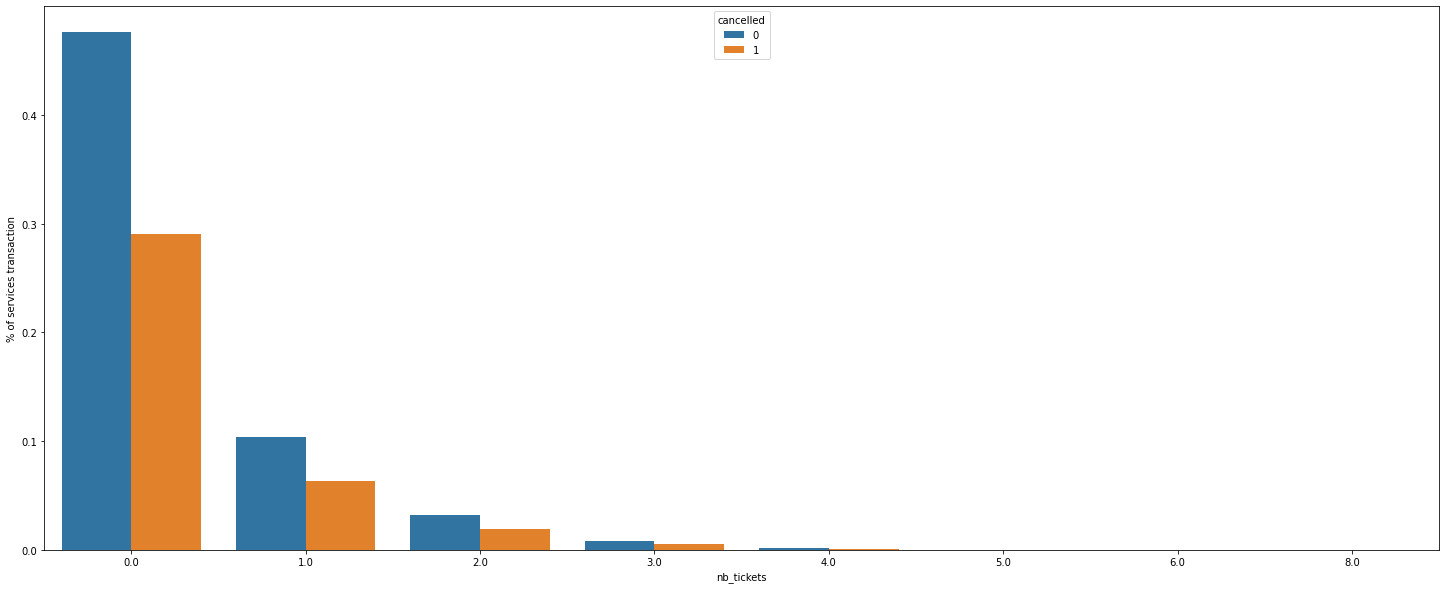

In [718]:
fig, axis = plt.subplots(1, 1, figsize=(25, 10))
axis_y = "% of services transaction"
variable_to_analyse = "nb_tickets"
a = service_contact_df.groupby(variable_to_analyse)["cancelled"].value_counts() / len(service_contact_df)
a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis)

#### tikcets aggregations vs cancelled

In [719]:
channel_columns = ['channel_app', 'channel_chat', 'channel_mail', 'channel_phone', 'channel_visit']
reason_columns = ['reason_Administrative', 'reason_Issues', 'reason_Others', 'reason_Sales']
result_columns = ['result_Not Solved', 'result_Others', 'result_Solved']

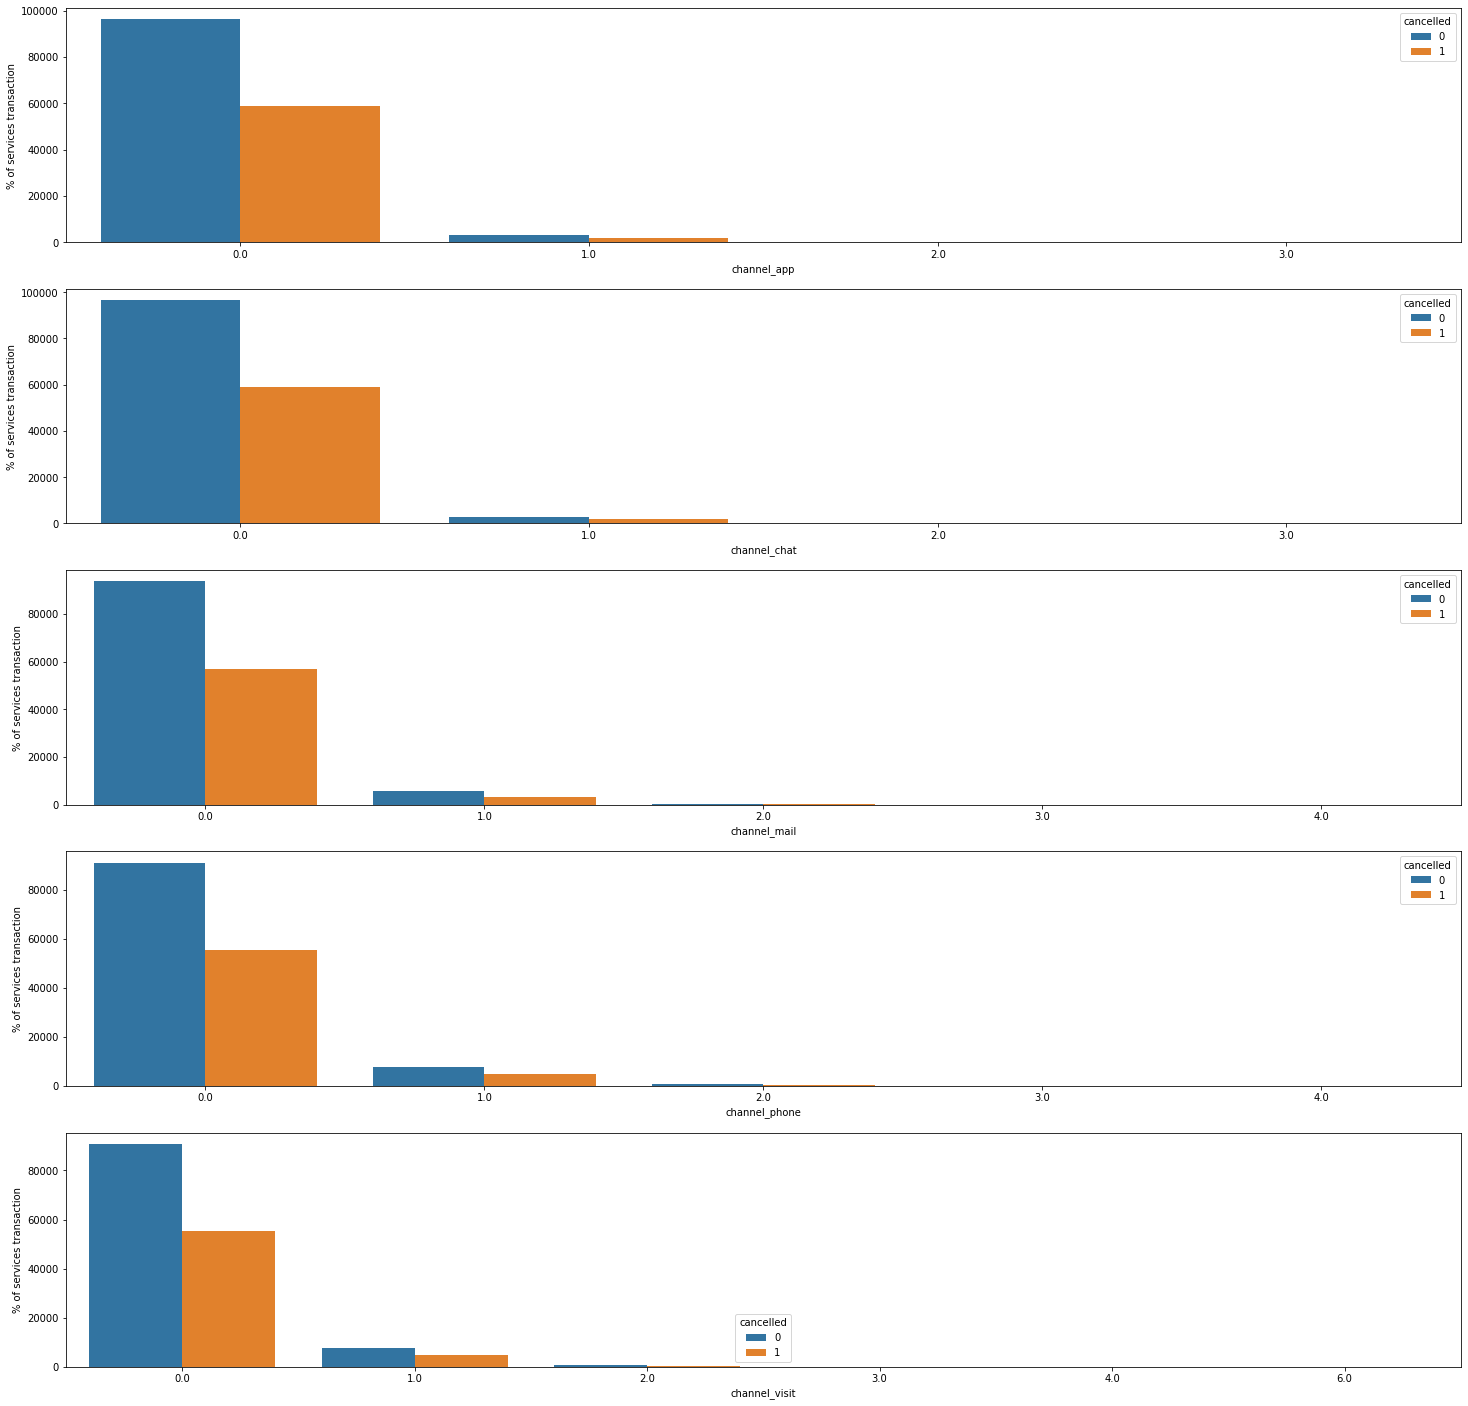

In [720]:
n = len(channel_columns)
fig, axis = plt.subplots(n, 1, figsize=(25, 5 * n))
axis_y = "% of services transaction"
for i, variable_to_analyse in enumerate(channel_columns):
    a = service_contact_df.groupby(variable_to_analyse)["cancelled"].value_counts()
    a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
    ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis[i])

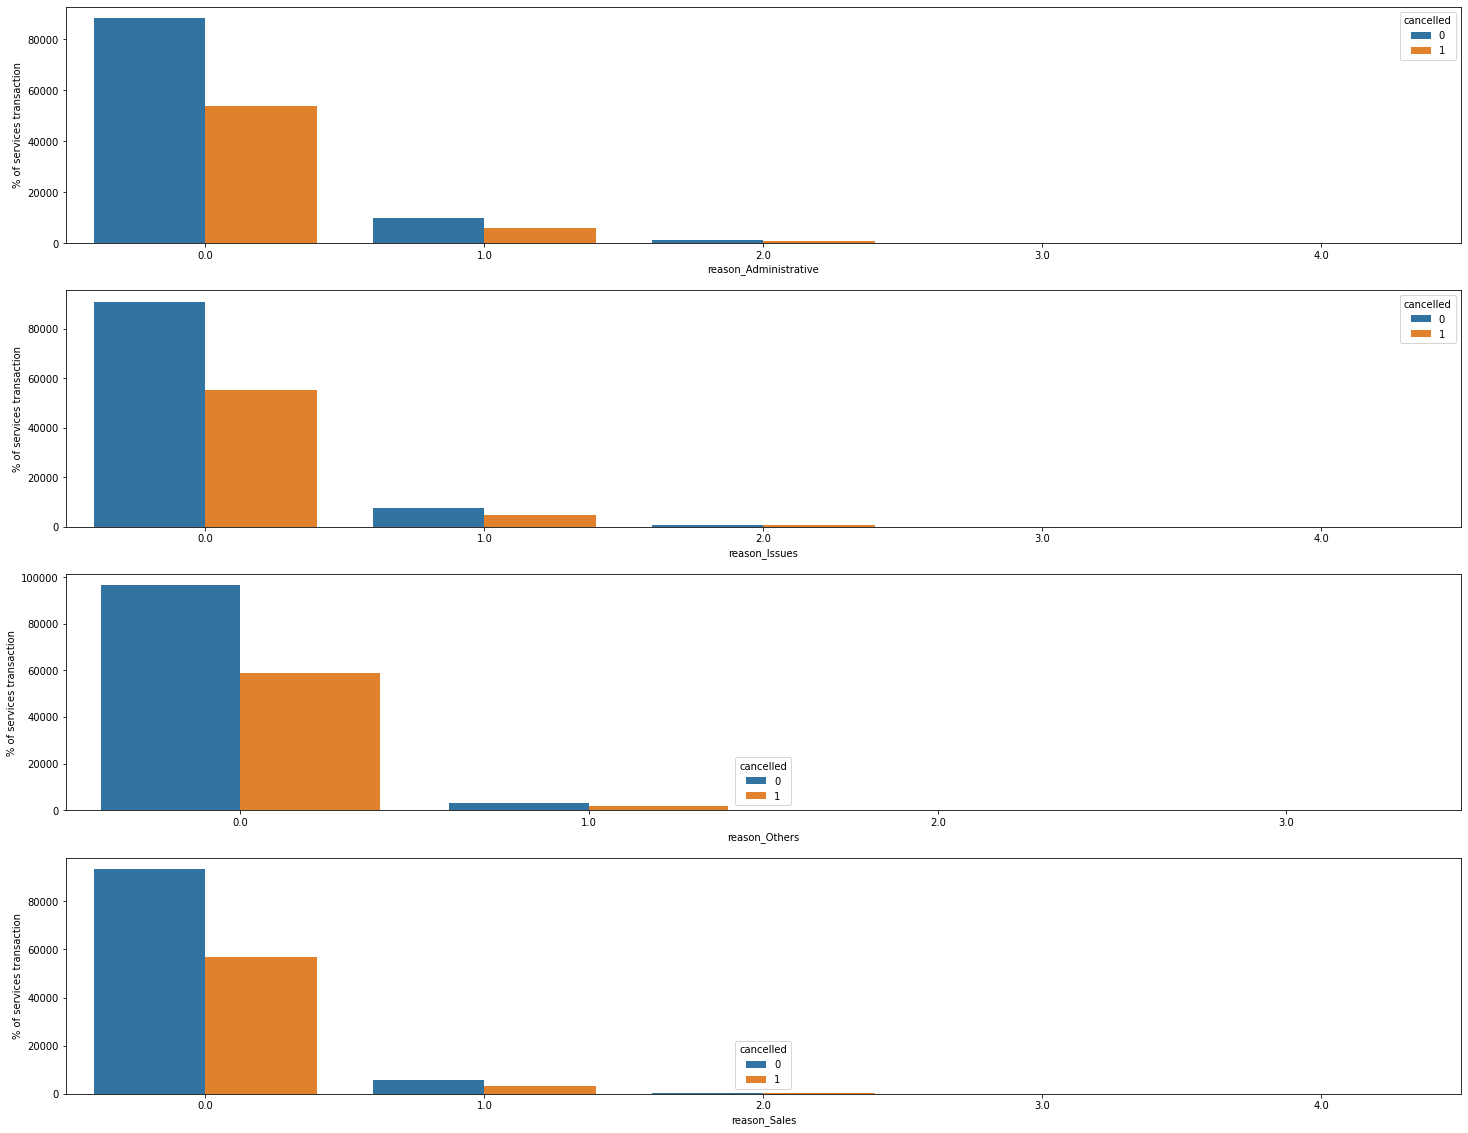

In [721]:
n = len(reason_columns)
fig, axis = plt.subplots(n, 1, figsize=(25, 5 * n))
axis_y = "% of services transaction"
for i, variable_to_analyse in enumerate(reason_columns):
    a = service_contact_df.groupby(variable_to_analyse)["cancelled"].value_counts()
    a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
    ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis[i])

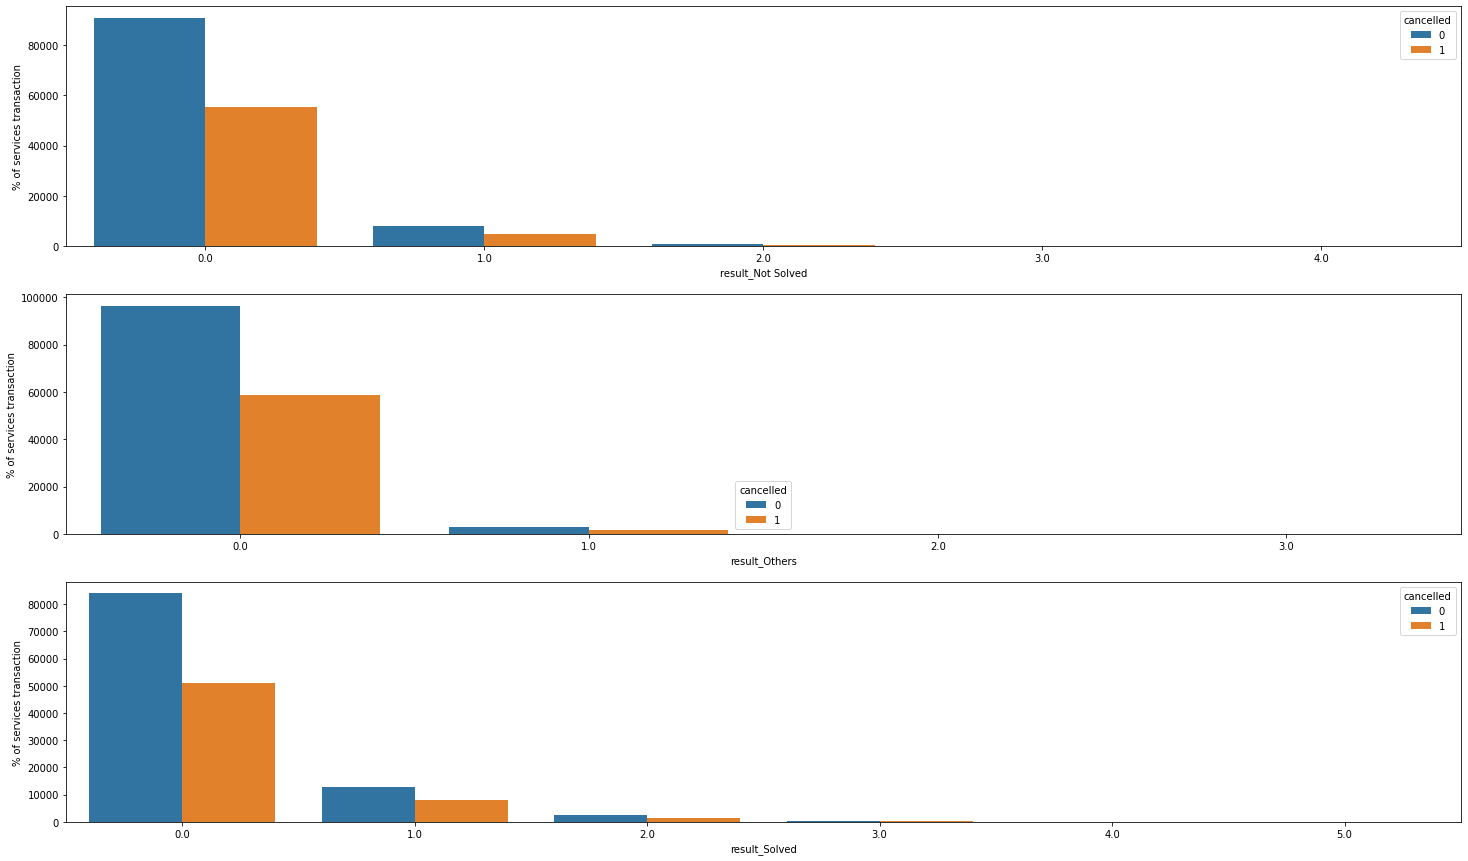

In [722]:
n = len(result_columns)
fig, axis = plt.subplots(n, 1, figsize=(25, 5 * n))
axis_y = "% of services transaction"
for i, variable_to_analyse in enumerate(result_columns):
    a = service_contact_df.groupby(variable_to_analyse)["cancelled"].value_counts()
    a = a.to_frame().rename({"cancelled": axis_y}, axis=1).reset_index()
    ax = sns.barplot(x=variable_to_analyse, y=axis_y, hue='cancelled', data=a, ax=axis[i])

# Join and dump Dataset

In [725]:
dataset = service_customer_df.merge(service_contact_df,
                                    how="inner",
                                    on=["cust_id_mask", "record_date_service", "product_id", "product_name", "default", "cancelled"])

dataset = dataset[["default", "product_id", "cancelled"]]

pid_dummies = pd.get_dummies(dataset["product_id"])
pid_columns = [f'pid_{elem}' for elem in pid_dummies.columns]
dataset[pid_columns] = pid_dummies

dataset.drop(columns="product_id", inplace=True)

dataset.head()

,default,cancelled,pid_CC0001,pid_CC0002,pid_IS0001,pid_IS0002
0,0,0,0,0,0,1
1,0,1,0,0,1,0
2,0,1,0,1,0,0
3,1,1,0,0,1,0
4,1,1,0,0,1,0


In [726]:
dataset.to_csv(DATA_PATH + "dataset.csv", index=False)